In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#import our plotting libraries
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')



In [2]:
#read in the entire house dataset,
house_df = pd.read_csv('LF dataset.csv')

#outputs the no of rows and columns in the dataset,
print('=> The number of rows and columns in our dataset is (rows, columns):')
print(house_df.shape,'\n')



=> The number of rows and columns in our dataset is (rows, columns):
(934, 26) 



In [3]:
#outputs the columns header,
print('=> A sample of the column headers in the dataset are:')
print(house_df.iloc[:,2:8].columns.values)



=> A sample of the column headers in the dataset are:
['Name' 'AL' 'SNR' 'K1_D' 'K1_m' 'K1_Degree']


In [4]:
#outputs the summary statistics and info,
print('\n=> These are the summary statistics for a sample of the columns:\n')
print(house_df.iloc[:,3:10].describe())
print('\n=> These are the info for a sample of the columns:\n')
print(house_df.iloc[:,1:8].info())


=> These are the summary statistics for a sample of the columns:

               AL        K1_D   K1_Degree        K2_D        K2_m
count  934.000000  934.000000  427.000000  934.000000  427.000000
mean    22.771218   44.235846   91.165691   45.153597    9.089789
std      0.830461    1.615422   41.583499    1.672160   33.806040
min     20.220000   38.250000    0.000000   38.250000    6.610000
25%     22.280000   43.250000   72.000000   44.000000    7.270000
50%     22.720000   44.190000   91.000000   45.000000    7.470000
75%     23.257500   45.250000  111.000000   46.250000    7.630000
max     28.710000   49.250000  178.000000   51.060000  706.000000

=> These are the info for a sample of the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  934 non-null    object 
 1   Name        934 non-null    object 
 2   AL          9

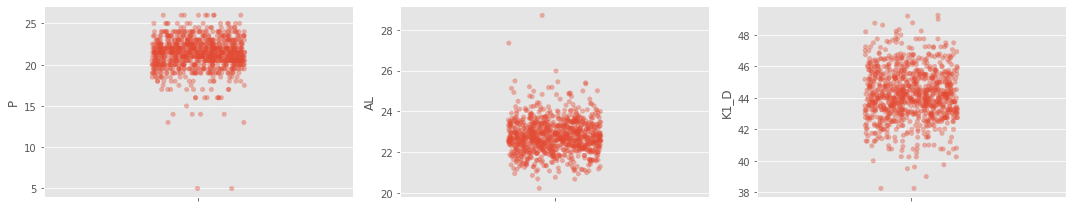

In [5]:
sample_df = house_df[['P', 'AL','K1_D']]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.4)
    plt.tight_layout()
    plt.show()

stripplot_these(sample_df)

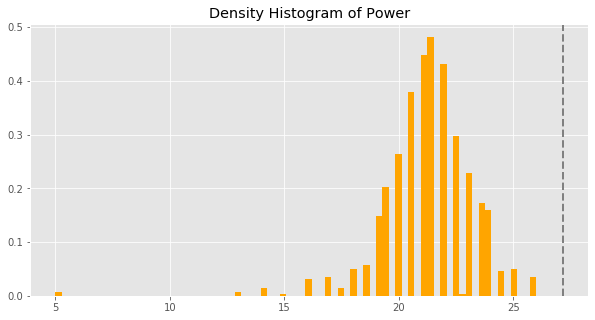

In [11]:

#plotting histogram of values with density values and outlier threshold 
mu = house_df.P.mean()
sd = house_df.P.std()
li = mu + 3 * sd
plt.figure(figsize=(10, 5))
plt.title('Density Histogram of Power')
plt.hist(house_df.P, bins=75,density=True,color='orange')
plt.axvline(li, color='grey', linestyle='dashed', linewidth=2)
plt.show()

In [12]:

#list of column names to keep
col_names = ['P','AL', 'K1_D', 'K2_D', 'SRK_II','SRK_II_ACONST']

#creating new filtered dataframe
new_df =  house_df[col_names]

#print the new shape of the data,
print('The current number of rows and columns is:\n')
print(new_df.shape)
print('\nWe have reduce the number of variables from 81 to', new_df.shape[1],'\n')

#checking summary statistics and info of new dataframe
print(new_df.info())

The current number of rows and columns is:

(934, 6)

We have reduce the number of variables from 81 to 6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P              934 non-null    float64
 1   AL             934 non-null    float64
 2   K1_D           934 non-null    float64
 3   K2_D           934 non-null    float64
 4   SRK_II         934 non-null    float64
 5   SRK_II_ACONST  934 non-null    float64
dtypes: float64(6)
memory usage: 43.9 KB
None


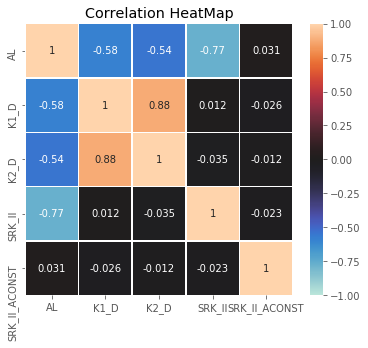

In [13]:
#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)
features = new_df.loc[:,new_df.columns != 'P']
targets = new_df.loc[:,new_df.columns == 'P']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [14]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 20% of the data,
X_train, X_test, y_train, y_test = train_test_split(features,targets, 
                                                    test_size=0.2, 
                                                    random_state=42)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 747 rows
Our training independent variable contains : 747 rows
Our testing prediction variable contains : 187 rows
Our testing independent variable contains : 187 rows


In [15]:
#Allows us access to Scikit-learn linear regression model,
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Instantiate the regression model and setting parameters if any,
reg_model = LinearRegression()

In [11]:
#fitting the training data to the model,
reg_model.fit(X_train, y_train)

#outputs the coefficients
print('Intercept :', reg_model.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_[0]}))

Intercept : 9.815540244975939 

        features  coeficients
0             AL    -0.191959
1           K1_D    -0.053915
2           K2_D    -0.025523
3         SRK_II     0.913489
4  SRK_II_ACONST    -0.000480


In [12]:
#outputs the training and testing scores
print("Training set score: {:.2f}".format(reg_model.score(X_train, y_train)))

Training set score: 0.88


In [13]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression()
cv_scores = cross_val_score(cv_reg_model, features, targets,cv=10, scoring='r2')

#outputs the scores
print('Cross Validation scores: {}'.format(cv_scores))
print("\nAverage 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Cross Validation scores: [ 0.97016185  0.88698044  0.88240203  0.94870707  0.93752034  0.93439847
  0.93695649  0.91028816 -0.16052676  0.59242883]

Average 10-Fold CV Score: 0.7839316916783273


In [9]:
#prediction values using testing set
y_pred = reg_model.predict(X_test)
print(X_test)


#printing sample of predictions
print('Sample predictions are:\n', y_pred[:5].flatten())

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
print(y_test_a)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of our predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['P'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['P'],s=10)
plt.xlabel('Predicted Power')
plt.ylabel('Actual Power')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted Power')
plt.show()


NameError: name 'reg_model' is not defined

In [10]:
#stats model library allows us to run OLS directly,
import statsmodels.api as sm 
#higher adj r2 better model
#re-run OLS model as sm_model using training and testing dataset,
X_train_sm = sm.add_constant(X_train)
sm_train_model = sm.OLS(y_train, X_train_sm).fit()
print('Training set adj r2: {}'.format(sm_train_model.rsquared_adj))

#higher k fold cv better model
#run CV again and loop through results applying adjusted r2 formula. Output the results
cv_scores_r2 = cross_val_score(cv_reg_model, features, targets,cv=10, scoring='r2')
cv_scores_adj = []
n = len(features)
k = len(features.columns)
for r in cv_scores_r2:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cv_scores_adj.append(adj_r2)
print('Average 10-Fold CV adj r2: {}'.format(np.mean(cv_scores_adj)))

NameError: name 'X_train' is not defined

In [16]:
#for calculating MSE
#lower rmse better model
from sklearn.metrics import mean_squared_error

y_pred_test = reg_model.predict(X_test)
y_pred_train = reg_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 0.6799614610467947
Root Mean Squared Error of Testing Set: 0.4928892747584453


In [17]:
#lets us use the stats model ols model
import statsmodels.api as sm 
# less p value is better
#training the OLS algorithm and outputting the summary statistics
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())
print(sm_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1103.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:39:51   Log-Likelihood:                -771.81
No. Observations:                 747   AIC:                             1556.
Df Residuals:                     741   BIC:                             1583.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8155      4.797      2.046

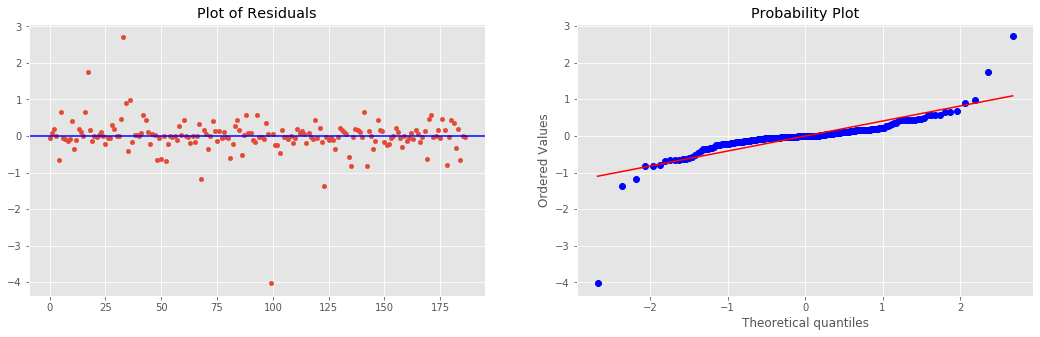

In [18]:
#calculate the residuals
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index(drop=True)
residuals = y_test.P - y_pred[0]

#plotting Residual and Probabililty graph
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)

plt.subplot(1,2,2)
plt.title('Probability Plot')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()